## Gaussian Process Regression 

A Gaussian process is a collection of random variables, any finite number of which have a joint Gaussian distribution \cite{b3}. It is completely characterized by a mean function, $m(\mathbf{x})$, and covariance function, $k(\mathbf{x,x'})$: 

\begin{equation*}
    f(\mathbf{x}) \sim \mathcal{GP} \big( m(\mathbf{x}), k(\mathbf{x, x'}) \big) \, , 
\end{equation*}

where its mean and covariance functions are defined as: 

\begin{equation*}
    \begin{aligned}
        m(\mathbf{x})    & = \mathbb{E}[f(\mathbf{x})] \\
        k(\mathbf{x,x'}) & = \mathbb{E}[f(\mathbf{x}) - m(\mathbf{x}) (f(\mathbf{x'}) - m(\mathbf{x'}) ) ] \, .  
    \end{aligned}
\end{equation*}

$k(\mathbf{x,x'})$ specifies the covariance between pairs of random variables, one example of which is the squared exponential (SE) function: 

\begin{equation*}
    cov \big( f(\mathbf{x}_p), f(\mathbf{x}_q) \big) = k(\mathbf{x}_p ,\mathbf{x}_q ) = exp \big( -\tfrac{1}{2} | \mathbf{x}_p  -\mathbf{x}_q |^2 \big) . 
\end{equation*}

### 1D example 

In [3]:
using GaussianProcesses 
using Random 

Random.seed!(0) 

# create training data
n = 10 ;                        # number of training points 
x = 2π * rand(n) ;              # predictors 
y = sin.(x) + 0.1 * randn(n) ;  # measurements / data / regressors 

# mean and covariance 
mZero = MeanZero() ;            # zero mean function 
kern = SE(0.0, 0.0) ;           # squared eponential kernel (hyperparams on log scale) 
log_noise = -1.0 ;              # (optional) log std dev of obs noise 

# fit GP 
gp  = GP(x, y, mZero, kern, log_noise) ; 


Now, use `predict_y` to predict function $\mathbf{f^*}$: 

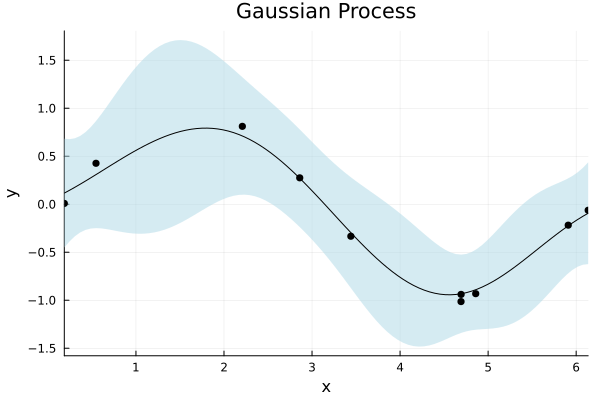

In [4]:
# predict function  
μ, σ² = predict_y( gp, range(0, stop=2π, length=100) )

# plot 
using Plots 
plot(gp; xlabel="x", ylabel="y", title="Gaussian Process", legend=false, fmt=:png) 


By default, all hyperparameters are optimized. The function `optimize!` can force hyperparameters to remain constant or optimized separately. 

In [5]:
# don't optimize kernel hyperparameters 
optimize!(gp; kern = false) ; 

# optimize in a box with lower bounds [-1,-1] and upper bounds [1,1]
optimize!(gp; kernbounds = [ [-1,-1] , [1,1] ])


 * Status: success

 * Candidate solution
    Final objective value:     -2.310286e+00

 * Found with
    Algorithm:     Fminbox with L-BFGS

 * Convergence measures
    |x - x'|               = 7.09e-07 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.03e-07 ≰ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 4.35e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    3
    f(x) calls:    35
    ∇f(x) calls:   35


### Multi-dimensional regression 

Consider a 2-dimensional regression example: 

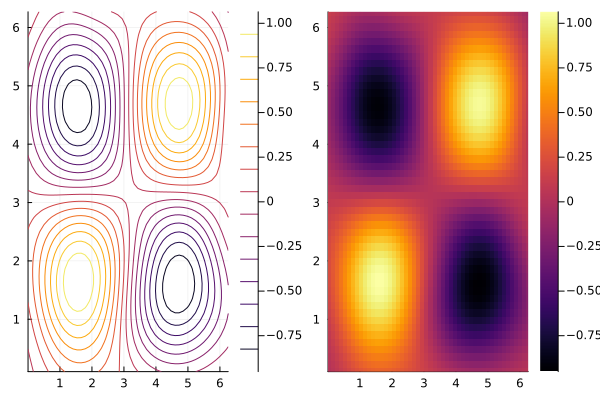

In [8]:
# training data
d = 2 ;                 # dimension 
n = 50 ;                # number of observations 
x = 2π * rand(d, n) ;   # predictors 
y = vec( sin.(x[1,:]) .* sin.(x[2,:]) )  + 0.1 * rand(n) ; 

# mean function and kernel 
mZero = MeanZero() ; 
kern  = SE(0.0, 0.0) ; 

# fit GP 
gp = GP(x, y, mZero, kern, -2.0) ; 

# plot 
plot(contour(gp), heatmap(gp); fmt=:png)


In [10]:
display(gp) 

GP Exact object:
  Dim = 2
  Number of observations = 50
  Mean function:
    Type: MeanZero, Params: Float64[]
  Kernel:
    Type: SEIso{Float64}, Params: [0.0, 0.0]
  Input observations = 
[6.15460120191444 3.2488121808173682 … 1.4281886897702896 0.002705659412164204; 4.478354272044107 5.961476644204157 … 3.9296511161748273 0.10790564580717373]
  Output observations = [0.15179819018443585, 0.08979014234031141, -0.6728597832603267, 0.26565550162026125, -0.23660174593603997, 0.5736963336344434, 0.48176158236790395, -0.17020132758537776, 0.7708212780699424, -0.6795072000125512  …  -0.7303787694638331, 0.11164161405002061, 0.37157475588548267, 0.038043986953571855, -0.0058949303087672406, 0.8129491184846243, 0.016272571493686855, 0.9045851601896927, -0.665266281361835, 0.02208088627325521]
  Variance of observation noise = 0.01831563888873418
  Marginal Log-Likelihood = -12.713